#### Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import itertools
from sklearn.decomposition import PCA

## Import .py
from HyperparameterSearch import Experimentacion_modelo
from SoftSvm import SVM, OVRSVM, OVOsvm
from RandomForest import RandomForest

In [2]:
def generate_csv(Y_pred, name_csv="predicctions.csv"):
    # Convertir el arreglo a un DataFrame de Pandas
    df_prediccion = pd.DataFrame({"y": Y_pred})

    # Crear una serie de Pandas con IDs incrementales
    ids = pd.Series(range(1, len(df_prediccion) + 1), name="ID")

    # Insertar la serie de IDs
    df_prediccion.insert(0, "ID", ids)

    # ruta
    name_csv = f"./predicctions/{name_csv}"
    df_prediccion.to_csv(name_csv, index=False)

## Cargando data con feattures extraidos

In [3]:
# cargando el csv de train
train_data = pd.read_csv("./data_final/match_ef_forest.csv")
test_data = pd.read_csv("./data_final/test_match_forest.csv")

In [4]:
train_data = train_data.dropna(axis=1)
test_data = test_data.dropna(axis=1)

# # Revisar las columnas en los datos de entrenamiento y prueba
# print("Columnas del conjunto de entrenamiento:", train_data.columns)
# print("Columnas del conjunto de prueba:", test_data.columns)

# Eliminar las cabeceras irrelevantes del conjunto de entrenamiento
X_train = train_data.drop(columns=['id', 'label', 'Unnamed: 0'], errors='ignore').values
Y_train = train_data['label'].astype(int).values

# Eliminar las cabeceras irrelevantes del conjunto de prueba
X_test = test_data.drop(columns=['id', 'label', 'Unnamed: 0'], errors='ignore').values
#y_test = test_data['label'].astype(int).values

# # Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalizar los valores de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Verificar el número de características y clases
n_features = X_train.shape[1]
n_classes = len(np.unique(Y_train))
print(f"Número de características: {n_features}")
print(f"Número de clases: {n_classes}")

# Reducir las características a 20 componentes usando PCA
n_components = 20
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
# X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

Número de características: 630
Número de clases: 6


# Experimentación

#### Modelos

* Modelo 1: SOFT SVM OVO
* Modelo 2: SOFT SVM OVR

## Evaluación de modelos

### Modelo 1: RANDOM FOREST

In [5]:
# Experimentacion
model_random_ovo = OVOsvm()
# params to OVOsvm: ( self,learning_rate=0.001, lambda_param=0.01, n_iters=2000, kernel='linear', gamma=0.01)

ovo_hyperparams = {
    "learning_rate": [0.001],
    "lambda_param": [0.01],
    "n_iters": [1000, 2000],
    "kernel": ["rbf"],
    "gamma": [0.1, 0.05, 0.01],
}
experiment_ovo = Experimentacion_modelo(model_random_ovo, ovo_hyperparams, X_train_pca, Y_train, X_test_pca, 5)

Mejores hiperparametros para OVO SVM: 
 {'learning_rate': 0.001, 'lambda_param': 0.01, 'n_iters': 2000, 'kernel': 'rbf', 'gamma': 0.01}
Duración del exerimentación: 2639.1675939559937 segundos


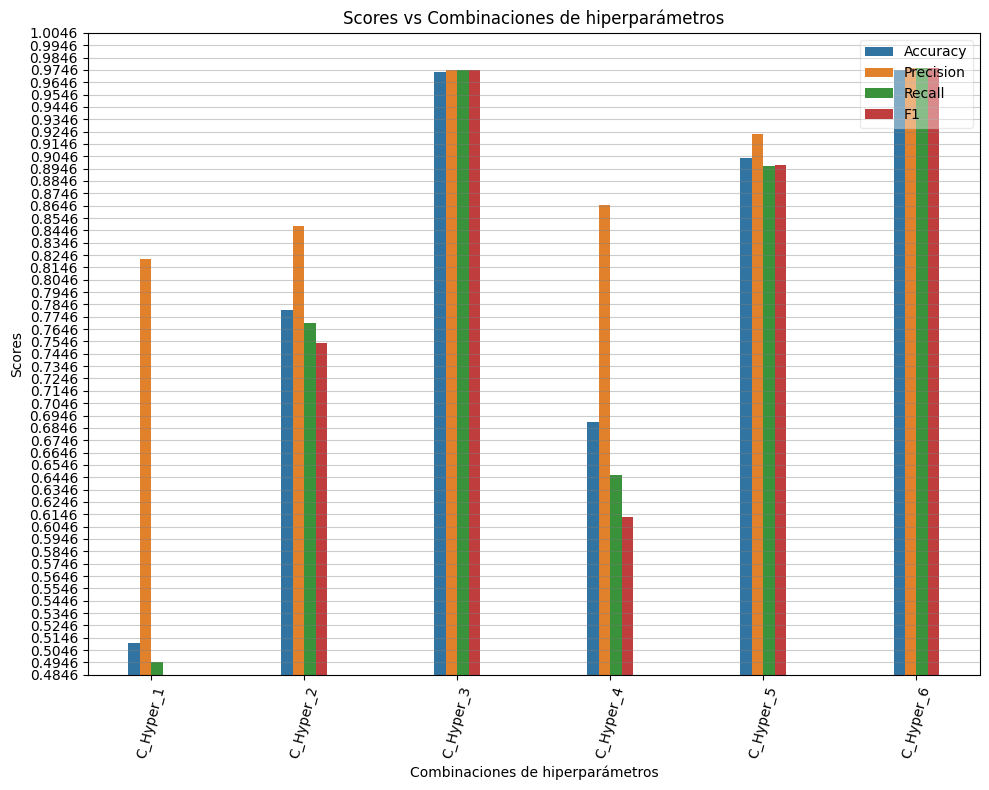

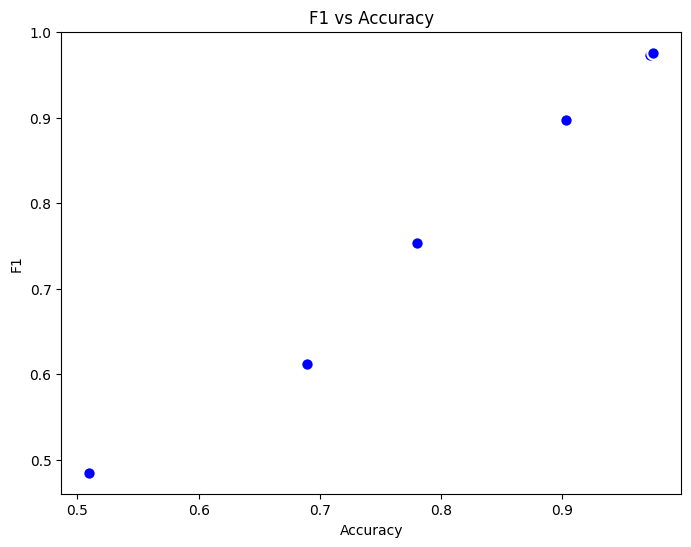

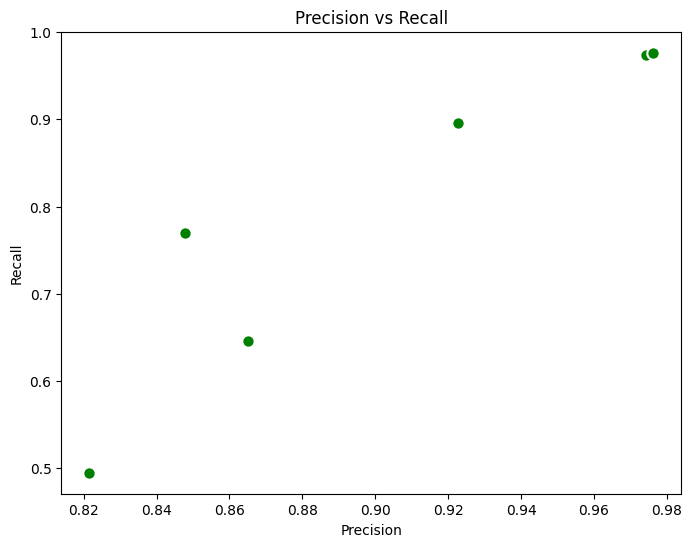

In [6]:
## Experimentacion
start_time = time.time()
best_hiper_rf = experiment_ovo.experimentacion()
end_time = time.time()
print("Mejores hiperparametros para OVO SVM: \n", best_hiper_rf)

exp_duration_ovo = end_time - start_time
print("Duración del exerimentación:", exp_duration_ovo, "segundos")

# plotear resultados de experimentacion para cada combinacion de hiperparametros
experiment_ovo.plot_metrics()

# plotear f1 vs accuracy
experiment_ovo.plot_f1_vs_accuracy()

# plotear precision vs recall
experiment_ovo.plot_precision_vs_recall()

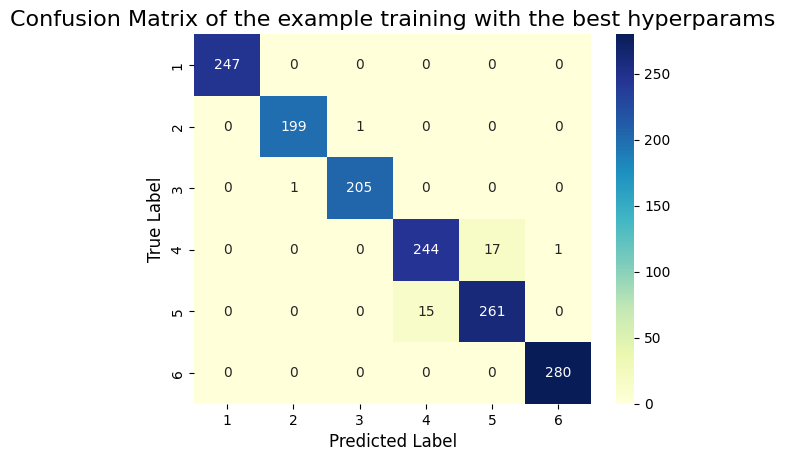

/home/dh/utec_2024_2/ml/Proyectos/venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


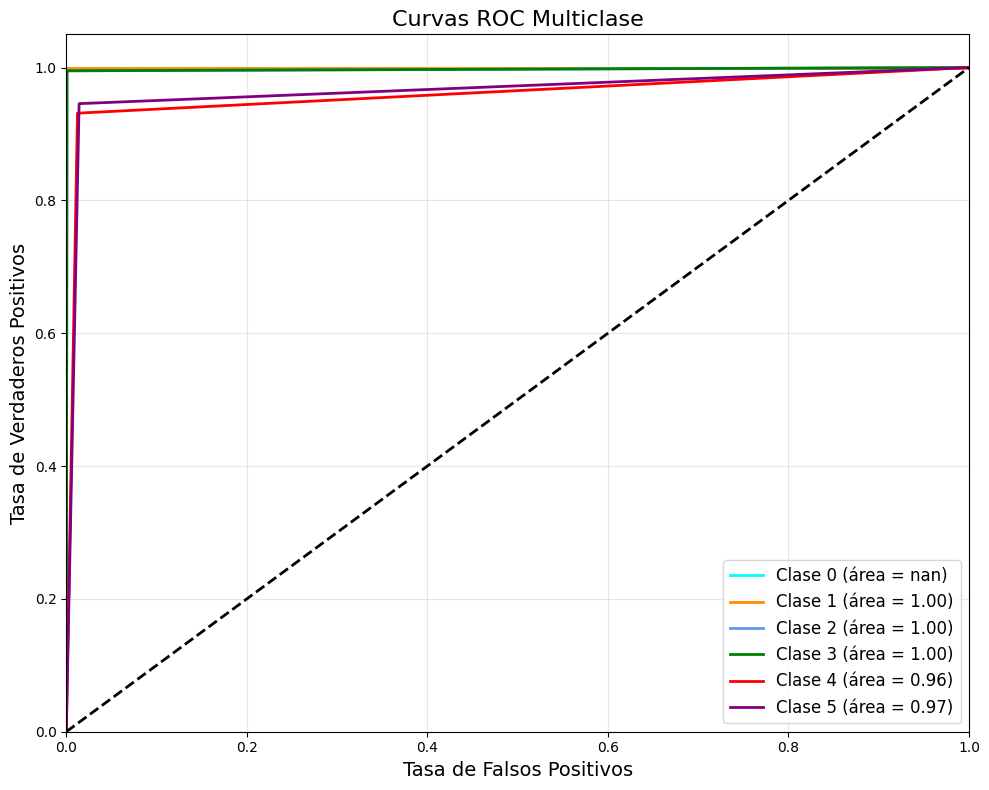

Label 1:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00

Label 2:
  Precision: 0.99
  Recall: 0.99
  F1-Score: 0.99

Label 3:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00

Label 4:
  Precision: 0.94
  Recall: 0.93
  F1-Score: 0.94

Label 5:
  Precision: 0.94
  Recall: 0.95
  F1-Score: 0.94

Label 6:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



In [9]:
# plotear matriz de confusion and ROC
ovo_model_temp = OVOsvm()
matriz_confusion = experiment_ovo.get_matrix_confusion(ovo_model_temp, i=0)

In [10]:
print("Top 5")
for i, hiper in enumerate(experiment_ovo.best_hiper):
    print(f"Hiperparametros {i+1}: ", hiper)
print()

reporte = experiment_ovo.generater_reporte()
print(reporte.head(10))

Top 5
Hiperparametros 1:  [0.001, 0.01, 2000, 'rbf', 0.01]
Hiperparametros 2:  [0.001, 0.01, 1000, 'rbf', 0.01]
Hiperparametros 3:  [0.001, 0.01, 2000, 'rbf', 0.05]
Hiperparametros 4:  [0.001, 0.01, 1000, 'rbf', 0.05]
Hiperparametros 5:  [0.001, 0.01, 2000, 'rbf', 0.1]

   Accuracy  Precision    Recall        F1                 Hiperparametros
0  0.509923   0.821599  0.494959  0.484562   [0.001, 0.01, 1000, rbf, 0.1]
1  0.780055   0.847723  0.769743  0.753238  [0.001, 0.01, 1000, rbf, 0.05]
2  0.972525   0.974249  0.974179  0.974086  [0.001, 0.01, 1000, rbf, 0.01]
3  0.689201   0.865011  0.646142  0.612337   [0.001, 0.01, 2000, rbf, 0.1]
4  0.903023   0.922742  0.896305  0.897170  [0.001, 0.01, 2000, rbf, 0.05]
5  0.974837   0.976225  0.976353  0.976198  [0.001, 0.01, 2000, rbf, 0.01]


In [11]:
# Predicciones finales
# Con los mejores hyperparametros
experiment_ovo.training_model(i=0)  # 0 porque es el top 1 en de un top 5 de best hiperparams
y_pred = experiment_ovo.predict(X_test_pca)

generate_csv(y_pred, name_csv="predicciones_ovo_1.csv")

# Con 2do's mejores
experiment_ovo.training_model(i=1)  # 0 porque es el top 1 en de un top 5 de best hiperparams
y_pred = experiment_ovo.predict(X_test_pca)

generate_csv(y_pred, name_csv="predicciones_ovo_2.csv")


# Con los terceros
experiment_ovo.training_model( i=0 )  # 0 porque es el top 1 en de un top 5 de best hiperparams
y_pred = experiment_ovo.predict(X_test_pca)

generate_csv(y_pred, name_csv="predicciones_ovo_3.csv")